In [1]:
import pandas as pd
from sqlalchemy import create_engine
from datetime import datetime

In [2]:
energy_data = "Resources/Project_2_total_energy_consumption_monthly.csv"
energy_data = pd.read_csv(energy_data)
energy_data.head()


,MSN,YYYYMM,Value,Column_Order,Description,Unit,Right,Left,Converted Date
0,TETCBUS,198706,6.283858,12,Total Primary Energy Consumption,Quadrillion Btu,6,1987,Jun-87
1,TETCBUS,198707,6.630484,12,Total Primary Energy Consumption,Quadrillion Btu,7,1987,Jul-87
2,TETCBUS,198708,6.518294,12,Total Primary Energy Consumption,Quadrillion Btu,8,1987,Aug-87
3,TETCBUS,198709,6.127542,12,Total Primary Energy Consumption,Quadrillion Btu,9,1987,Sep-87
4,TETCBUS,198710,6.366409,12,Total Primary Energy Consumption,Quadrillion Btu,10,1987,Oct-87


In [3]:
energy_data = energy_data.rename(columns={"Right": "Month", "Left": "Year"})
energy_data.head()

,MSN,YYYYMM,Value,Column_Order,Description,Unit,Month,Year,Converted Date
0,TETCBUS,198706,6.283858,12,Total Primary Energy Consumption,Quadrillion Btu,6,1987,Jun-87
1,TETCBUS,198707,6.630484,12,Total Primary Energy Consumption,Quadrillion Btu,7,1987,Jul-87
2,TETCBUS,198708,6.518294,12,Total Primary Energy Consumption,Quadrillion Btu,8,1987,Aug-87
3,TETCBUS,198709,6.127542,12,Total Primary Energy Consumption,Quadrillion Btu,9,1987,Sep-87
4,TETCBUS,198710,6.366409,12,Total Primary Energy Consumption,Quadrillion Btu,10,1987,Oct-87


In [4]:
energy_data.dtypes

MSN                object
YYYYMM              int64
Value             float64
Column_Order        int64
Description        object
Unit               object
Month               int64
Year                int64
Converted Date     object
dtype: object

In [5]:
# set index for energy data 
energy_data["Date_Index"] = energy_data['Month'].map(str) +"-"+ energy_data['Year'].map(str)
energy_data

,MSN,YYYYMM,Value,Column_Order,Description,Unit,Month,Year,Converted Date,Date_Index
0,TETCBUS,198706,6.283858,12,Total Primary Energy Consumption,Quadrillion Btu,6,1987,Jun-87,6-1987
1,TETCBUS,198707,6.630484,12,Total Primary Energy Consumption,Quadrillion Btu,7,1987,Jul-87,7-1987
2,TETCBUS,198708,6.518294,12,Total Primary Energy Consumption,Quadrillion Btu,8,1987,Aug-87,8-1987
3,TETCBUS,198709,6.127542,12,Total Primary Energy Consumption,Quadrillion Btu,9,1987,Sep-87,9-1987
4,TETCBUS,198710,6.366409,12,Total Primary Energy Consumption,Quadrillion Btu,10,1987,Oct-87,10-1987
5,TETCBUS,198711,6.346123,12,Total Primary Energy Consumption,Quadrillion Btu,11,1987,Nov-87,11-1987
6,TETCBUS,198712,7.281541,12,Total Primary Energy Consumption,Quadrillion Btu,12,1987,Dec-87,12-1987
7,TETCBUS,198713,79.054456,12,Total Primary Energy Consumption,Quadrillion Btu,13,1987,13/1987,13-1987
8,TETCBUS,198801,7.804136,12,Total Primary Energy Consumption,Quadrillion Btu,1,1988,Jan-88,1-1988
9,TETCBUS,198802,7.311849,12,Total Primary Energy Consumption,Quadrillion Btu,2,1988,Feb-88,2-1988


In [6]:
investor_sentiment = "Resources/Project_2_investor_sentiment_USA.csv"
investor_sentiment = pd.read_csv(investor_sentiment)
investor_sentiment.head()

,Old Date,Bullish,Neutral,Bearish,Total,Bullish 8-Week Mov Avg,Bull-Bear Spread,Bullish Average,Bullish Average + St. Dev,Bullish Average - St. Dev,S&P 500 Weekly High,S&P 500 Weekly Low,S&P 500 Weekly Close,Unnamed: 13,coverted Date,Date
0,6/30/2018,0.284483,0.307471,0.408046,1.000000,0.368306,-0.123563,0.382716,0.484453,0.280978,2774.86,2698.67,2699.63,NaN,18-Jun,18-Jun
1,5/31/2018,0.350181,0.386282,0.263538,1.000001,0.341175,0.086643,0.382716,0.484453,0.280978,2742.24,2676.81,2724.01,NaN,18-May,18-May
2,4/30/2018,0.369085,0.375394,0.255521,1.000000,0.326363,0.113564,0.382716,0.484453,0.280978,2717.49,2612.67,2639.40,NaN,18-Apr,18-Apr
3,3/31/2018,0.319361,0.327345,0.353293,0.999999,0.369871,-0.033932,0.382716,0.484453,0.280978,2739.14,2585.89,2605.00,NaN,18-Mar,18-Mar
4,2/28/2018,0.446512,0.325581,0.227907,1.000000,0.478704,0.218605,0.382716,0.484453,0.280978,2754.42,2637.08,2701.33,NaN,18-Feb,18-Feb


In [7]:
# Remake columns for dates of investor data 
# format as date
investor_sentiment['New Date'] = pd.to_datetime(investor_sentiment["Old Date"])


In [8]:
# Create year, month columns
# Create date index
investor_sentiment['Year'], investor_sentiment['Month'] = investor_sentiment['New Date'].dt.year, investor_sentiment['New Date'].dt.month  

In [9]:
# create year-month index combo for investor sentiment
investor_sentiment["Date_Index"] = investor_sentiment['Month'].map(str) +"-"+ investor_sentiment['Year'].map(str)

In [10]:
investor_sentiment.head()

,Old Date,Bullish,Neutral,Bearish,Total,Bullish 8-Week Mov Avg,Bull-Bear Spread,Bullish Average,Bullish Average + St. Dev,Bullish Average - St. Dev,S&P 500 Weekly High,S&P 500 Weekly Low,S&P 500 Weekly Close,Unnamed: 13,coverted Date,Date,New Date,Year,Month,Date_Index
0,6/30/2018,0.284483,0.307471,0.408046,1.000000,0.368306,-0.123563,0.382716,0.484453,0.280978,2774.86,2698.67,2699.63,NaN,18-Jun,18-Jun,2018-06-30,2018,6,6-2018
1,5/31/2018,0.350181,0.386282,0.263538,1.000001,0.341175,0.086643,0.382716,0.484453,0.280978,2742.24,2676.81,2724.01,NaN,18-May,18-May,2018-05-31,2018,5,5-2018
2,4/30/2018,0.369085,0.375394,0.255521,1.000000,0.326363,0.113564,0.382716,0.484453,0.280978,2717.49,2612.67,2639.40,NaN,18-Apr,18-Apr,2018-04-30,2018,4,4-2018
3,3/31/2018,0.319361,0.327345,0.353293,0.999999,0.369871,-0.033932,0.382716,0.484453,0.280978,2739.14,2585.89,2605.00,NaN,18-Mar,18-Mar,2018-03-31,2018,3,3-2018
4,2/28/2018,0.446512,0.325581,0.227907,1.000000,0.478704,0.218605,0.382716,0.484453,0.280978,2754.42,2637.08,2701.33,NaN,18-Feb,18-Feb,2018-02-28,2018,2,2-2018


In [11]:
investor_sentiment.dtypes

Old Date                             object
Bullish                             float64
Neutral                             float64
Bearish                             float64
Total                               float64
Bullish 8-Week Mov Avg              float64
Bull-Bear Spread                    float64
Bullish Average                     float64
Bullish Average + St. Dev           float64
Bullish Average - St. Dev           float64
S&P 500 Weekly High                 float64
S&P 500 Weekly Low                  float64
S&P 500 Weekly Close                float64
Unnamed: 13                         float64
coverted Date                        object
Date                                 object
New Date                     datetime64[ns]
Year                                  int64
Month                                 int64
Date_Index                           object
dtype: object

In [12]:
energy_data.head()

,MSN,YYYYMM,Value,Column_Order,Description,Unit,Month,Year,Converted Date,Date_Index
0,TETCBUS,198706,6.283858,12,Total Primary Energy Consumption,Quadrillion Btu,6,1987,Jun-87,6-1987
1,TETCBUS,198707,6.630484,12,Total Primary Energy Consumption,Quadrillion Btu,7,1987,Jul-87,7-1987
2,TETCBUS,198708,6.518294,12,Total Primary Energy Consumption,Quadrillion Btu,8,1987,Aug-87,8-1987
3,TETCBUS,198709,6.127542,12,Total Primary Energy Consumption,Quadrillion Btu,9,1987,Sep-87,9-1987
4,TETCBUS,198710,6.366409,12,Total Primary Energy Consumption,Quadrillion Btu,10,1987,Oct-87,10-1987


In [13]:
# rename columns  for energy data
energy_data = energy_data.rename(columns={"Value": "Total Primary Energy Consumption (Quadrillion BTUs)"})



In [14]:
# drop columns for energy data 
energy_data_refined = energy_data.drop(columns=["MSN", "YYYYMM", "Column_Order", "Unit", "Year", "Month", "Description", "Converted Date"])


In [15]:
# set index for energy data
energy_indexed= energy_data_refined.set_index("Date_Index")
energy_indexed.head()

,Total Primary Energy Consumption (Quadrillion BTUs)
Date_Index,
6-1987,6.283858
7-1987,6.630484
8-1987,6.518294
9-1987,6.127542
10-1987,6.366409


In [16]:
investor_sentiment

,Old Date,Bullish,Neutral,Bearish,Total,Bullish 8-Week Mov Avg,Bull-Bear Spread,Bullish Average,Bullish Average + St. Dev,Bullish Average - St. Dev,S&P 500 Weekly High,S&P 500 Weekly Low,S&P 500 Weekly Close,Unnamed: 13,coverted Date,Date,New Date,Year,Month,Date_Index
0,6/30/2018,0.284483,0.307471,0.408046,1.000000,0.368306,-0.123563,0.382716,0.484453,0.280978,2774.860000,2698.670000,2699.630000,NaN,18-Jun,18-Jun,2018-06-30,2018,6,6-2018
1,5/31/2018,0.350181,0.386282,0.263538,1.000001,0.341175,0.086643,0.382716,0.484453,0.280978,2742.240000,2676.810000,2724.010000,NaN,18-May,18-May,2018-05-31,2018,5,5-2018
2,4/30/2018,0.369085,0.375394,0.255521,1.000000,0.326363,0.113564,0.382716,0.484453,0.280978,2717.490000,2612.670000,2639.400000,NaN,18-Apr,18-Apr,2018-04-30,2018,4,4-2018
3,3/31/2018,0.319361,0.327345,0.353293,0.999999,0.369871,-0.033932,0.382716,0.484453,0.280978,2739.140000,2585.890000,2605.000000,NaN,18-Mar,18-Mar,2018-03-31,2018,3,3-2018
4,2/28/2018,0.446512,0.325581,0.227907,1.000000,0.478704,0.218605,0.382716,0.484453,0.280978,2754.420000,2637.080000,2701.330000,NaN,18-Feb,18-Feb,2018-02-28,2018,2,2-2018
5,1/31/2018,0.454545,0.305195,0.240260,1.000000,0.491267,0.214285,0.382716,0.484453,0.280978,2852.970000,2778.380000,2837.540000,NaN,18-Jan,18-Jan,2018-01-31,2018,1,1-2018
6,12/31/2017,0.526455,0.267196,0.206349,1.000000,0.413640,0.320106,0.382716,0.484453,0.280978,2694.440000,2676.110000,2682.620000,NaN,17-Dec,17-Dec,2017-12-31,2017,12,12-2017
7,11/30/2017,0.359459,0.324324,0.316216,0.999999,0.385354,0.043243,0.382716,0.484453,0.280978,2634.890000,2589.170000,2626.070000,NaN,17-Nov,17-Nov,2017-11-30,2017,11,11-2017
8,10/31/2017,0.396396,0.273273,0.330330,0.999999,0.371215,0.066066,0.382716,0.484453,0.280978,2578.290000,2544.000000,2557.150000,NaN,17-Oct,17-Oct,2017-10-31,2017,10,10-2017
9,9/30/2017,0.333333,0.379310,0.287356,0.999999,0.331219,0.045977,0.382716,0.484453,0.280978,2511.750000,2488.030000,2507.040000,NaN,17-Sep,17-Sep,2017-09-30,2017,9,9-2017


In [17]:
# drop columns for investor data

investor_sentiment_refined = investor_sentiment.drop(columns=["Old Date", "Total", "Bullish 8-Week Mov Avg", "Bullish Average", "Bullish Average + St. Dev", "Bullish Average - St. Dev", "S&P 500 Weekly High", "S&P 500 Weekly Low", "Unnamed: 13"])
investor_sentiment_refined

,Bullish,Neutral,Bearish,Bull-Bear Spread,S&P 500 Weekly Close,coverted Date,Date,New Date,Year,Month,Date_Index
0,0.284483,0.307471,0.408046,-0.123563,2699.630000,18-Jun,18-Jun,2018-06-30,2018,6,6-2018
1,0.350181,0.386282,0.263538,0.086643,2724.010000,18-May,18-May,2018-05-31,2018,5,5-2018
2,0.369085,0.375394,0.255521,0.113564,2639.400000,18-Apr,18-Apr,2018-04-30,2018,4,4-2018
3,0.319361,0.327345,0.353293,-0.033932,2605.000000,18-Mar,18-Mar,2018-03-31,2018,3,3-2018
4,0.446512,0.325581,0.227907,0.218605,2701.330000,18-Feb,18-Feb,2018-02-28,2018,2,2-2018
5,0.454545,0.305195,0.240260,0.214285,2837.540000,18-Jan,18-Jan,2018-01-31,2018,1,1-2018
6,0.526455,0.267196,0.206349,0.320106,2682.620000,17-Dec,17-Dec,2017-12-31,2017,12,12-2017
7,0.359459,0.324324,0.316216,0.043243,2626.070000,17-Nov,17-Nov,2017-11-30,2017,11,11-2017
8,0.396396,0.273273,0.330330,0.066066,2557.150000,17-Oct,17-Oct,2017-10-31,2017,10,10-2017
9,0.333333,0.379310,0.287356,0.045977,2507.040000,17-Sep,17-Sep,2017-09-30,2017,9,9-2017


In [18]:
# rename columns for investor data
investor_sentiment_renamed =investor_sentiment_refined.rename(columns={"Bullish": "Bullish Sentiment", "Neutral": "Neutral Sentiment", "Bearish": "Bearish Sentiment", "coverted Date": "Date"})
investor_sentiment_renamed

,Bullish Sentiment,Neutral Sentiment,Bearish Sentiment,Bull-Bear Spread,S&P 500 Weekly Close,Date,Date,New Date,Year,Month,Date_Index
0,0.284483,0.307471,0.408046,-0.123563,2699.630000,18-Jun,18-Jun,2018-06-30,2018,6,6-2018
1,0.350181,0.386282,0.263538,0.086643,2724.010000,18-May,18-May,2018-05-31,2018,5,5-2018
2,0.369085,0.375394,0.255521,0.113564,2639.400000,18-Apr,18-Apr,2018-04-30,2018,4,4-2018
3,0.319361,0.327345,0.353293,-0.033932,2605.000000,18-Mar,18-Mar,2018-03-31,2018,3,3-2018
4,0.446512,0.325581,0.227907,0.218605,2701.330000,18-Feb,18-Feb,2018-02-28,2018,2,2-2018
5,0.454545,0.305195,0.240260,0.214285,2837.540000,18-Jan,18-Jan,2018-01-31,2018,1,1-2018
6,0.526455,0.267196,0.206349,0.320106,2682.620000,17-Dec,17-Dec,2017-12-31,2017,12,12-2017
7,0.359459,0.324324,0.316216,0.043243,2626.070000,17-Nov,17-Nov,2017-11-30,2017,11,11-2017
8,0.396396,0.273273,0.330330,0.066066,2557.150000,17-Oct,17-Oct,2017-10-31,2017,10,10-2017
9,0.333333,0.379310,0.287356,0.045977,2507.040000,17-Sep,17-Sep,2017-09-30,2017,9,9-2017


In [19]:
# set index for investor data

investor_indexed = investor_sentiment_renamed.set_index("Date_Index")
investor_indexed.head()


,Bullish Sentiment,Neutral Sentiment,Bearish Sentiment,Bull-Bear Spread,S&P 500 Weekly Close,Date,Date,New Date,Year,Month
Date_Index,,,,,,,,,,
6-2018,0.284483,0.307471,0.408046,-0.123563,2699.63,18-Jun,18-Jun,2018-06-30,2018,6
5-2018,0.350181,0.386282,0.263538,0.086643,2724.01,18-May,18-May,2018-05-31,2018,5
4-2018,0.369085,0.375394,0.255521,0.113564,2639.40,18-Apr,18-Apr,2018-04-30,2018,4
3-2018,0.319361,0.327345,0.353293,-0.033932,2605.00,18-Mar,18-Mar,2018-03-31,2018,3
2-2018,0.446512,0.325581,0.227907,0.218605,2701.33,18-Feb,18-Feb,2018-02-28,2018,2


In [20]:
# merge data sets on date index 
merged_data = pd.DataFrame.merge(energy_indexed, investor_indexed, on="Date_Index")
merged_data.head(20)
#merged_data

,Total Primary Energy Consumption (Quadrillion BTUs),Bullish Sentiment,Neutral Sentiment,Bearish Sentiment,Bull-Bear Spread,S&P 500 Weekly Close,Date,Date,New Date,Year,Month
Date_Index,,,,,,,,,,,
6-1987,6.283858,NaN,NaN,NaN,NaN,NaN,Jun-87,1-Jun,1987-06-30,1987,6
7-1987,6.630484,0.26,0.48,0.26,0.00,318.66,Jul-87,1-Jul,1987-07-31,1987,7
8-1987,6.518294,0.52,0.18,0.30,0.22,323.04,Aug-87,1-Aug,1987-08-31,1987,8
9-1987,6.127542,0.53,0.17,0.30,0.23,320.16,Sep-87,1-Sep,1987-09-30,1987,9
10-1987,6.366409,0.44,0.23,0.33,0.11,251.79,Oct-87,1-Oct,1987-10-31,1987,10
11-1987,6.346123,0.27,0.46,0.27,0.00,240.34,Nov-87,1-Nov,1987-11-30,1987,11
12-1987,7.281541,0.25,0.49,0.26,-0.01,247.08,Dec-87,1-Dec,1987-12-31,1987,12
1-1988,7.804136,0.26,0.45,0.29,-0.03,257.07,Jan-88,1-Jan,1988-01-31,1988,1
2-1988,7.311849,0.30,0.51,0.19,0.11,262.46,Feb-88,1-Feb,1988-02-29,1988,2


In [21]:
merged_data.describe()

,Total Primary Energy Consumption (Quadrillion BTUs),Bullish Sentiment,Neutral Sentiment,Bearish Sentiment,Bull-Bear Spread,S&P 500 Weekly Close,Year,Month
count,373.000000,372.000000,372.000000,372.000000,372.000000,372.000000,373.000000,373.00000
mean,7.850449,0.385664,0.312137,0.302196,0.083468,1114.300242,2002.458445,6.49866
std,0.681195,0.101233,0.082521,0.095346,0.178518,606.682673,8.994115,3.45215
min,6.127542,0.170000,0.106700,0.066700,-0.380000,240.340000,1987.000000,1.00000
25%,7.471880,0.308196,0.257675,0.229875,-0.042548,511.210000,1995.000000,4.00000
50%,7.809119,0.380000,0.312250,0.296409,0.075600,1123.905000,2002.000000,6.00000
75%,8.312785,0.450000,0.370000,0.364741,0.210000,1399.082500,2010.000000,9.00000
max,9.668643,0.714300,0.540000,0.610000,0.628600,2837.540000,2018.000000,12.00000


In [22]:
merged_data.dtypes

Total Primary Energy Consumption (Quadrillion BTUs)           float64
Bullish Sentiment                                             float64
Neutral Sentiment                                             float64
Bearish Sentiment                                             float64
Bull-Bear Spread                                              float64
S&P 500 Weekly Close                                          float64
Date                                                           object
Date                                                           object
New Date                                               datetime64[ns]
Year                                                            int64
Month                                                           int64
dtype: object

In [23]:
# drop columns for merged data

merged_data = merged_data.drop(columns=["New Date"])

In [24]:
print (merged_data)

            Total Primary Energy Consumption (Quadrillion BTUs)  \
Date_Index                                                        
6-1987                                               6.283858     
7-1987                                               6.630484     
8-1987                                               6.518294     
9-1987                                               6.127542     
10-1987                                              6.366409     
11-1987                                              6.346123     
12-1987                                              7.281541     
1-1988                                               7.804136     
2-1988                                               7.311849     
3-1988                                               7.300926     
4-1988                                               6.453888     
5-1988                                               6.394683     
6-1988                                               6.511855 

In [25]:
#merged_drop_columns =merged_data.drop(columns=["Unnamed: 14", "Unnamed: 15", "Unnamed: 16", "Unnamed: 17", "Year", "Month"])
#merged_final = merged_drop_columns.drop(["6-1987"])

#merged_final = merged_data
#merged_final.to_csv('merged_final.csv')

merged_drop_columns = merged_data.drop(columns=["Date", "Date", "Year", "Month"])
merged_final = merged_drop_columns.drop(["6-1987"])
merged_final.to_csv('merged_final.csv')
merged_final

,Total Primary Energy Consumption (Quadrillion BTUs),Bullish Sentiment,Neutral Sentiment,Bearish Sentiment,Bull-Bear Spread,S&P 500 Weekly Close
Date_Index,,,,,,
7-1987,6.630484,0.260000,0.480000,0.260000,0.000000,318.660000
8-1987,6.518294,0.520000,0.180000,0.300000,0.220000,323.040000
9-1987,6.127542,0.530000,0.170000,0.300000,0.230000,320.160000
10-1987,6.366409,0.440000,0.230000,0.330000,0.110000,251.790000
11-1987,6.346123,0.270000,0.460000,0.270000,0.000000,240.340000
12-1987,7.281541,0.250000,0.490000,0.260000,-0.010000,247.080000
1-1988,7.804136,0.260000,0.450000,0.290000,-0.030000,257.070000
2-1988,7.311849,0.300000,0.510000,0.190000,0.110000,262.460000
3-1988,7.300926,0.450000,0.380000,0.170000,0.280000,258.510000


In [26]:
#merged_final["Date_Index"]
#.name.unique()

In [27]:
import pandas as pd
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine
import pymongo
from pymongo import MongoClient
import os
import json
import datetime

In [28]:
# Setup connection to mongodb
conn = "mongodb://localhost:27017"
client = pymongo.MongoClient(conn)

In [29]:
# Select database and collection to use
#db1 = client.energy_data
#collection = db1.energy_data_values

#db2 = client.investor_sentiment
#collection = db2.investor_sentiment_values

db = client.energy_sentiment_data
collection = db.historical_values

In [30]:
# ====== Inserting Documents ====== #


# Creating a simple Pandas DataFrame
# liste_hello = ['hello1','hello2']
# liste_world = ['world1','world2']

# df = pd.DataFrame(data = {'hello' : liste_hello, 'world': liste_world})


#df = pd.DataFrame.from_dict({'A': {1: datetime.datetime.now()}})
'''
df_to_load_into_JSON_1 = pd.DataFrame.from_dict(energy_data)
df_to_load_into_JSON_1

df_to_load_into_JSON_2 = pd.DataFrame.from_dict(investor_sentiment)
#df_to_load_into_JSON_2
'''

df_to_load_into_JSON = pd.DataFrame.from_dict(merged_final)
df_to_load_into_JSON

,Total Primary Energy Consumption (Quadrillion BTUs),Bullish Sentiment,Neutral Sentiment,Bearish Sentiment,Bull-Bear Spread,S&P 500 Weekly Close
Date_Index,,,,,,
7-1987,6.630484,0.260000,0.480000,0.260000,0.000000,318.660000
8-1987,6.518294,0.520000,0.180000,0.300000,0.220000,323.040000
9-1987,6.127542,0.530000,0.170000,0.300000,0.230000,320.160000
10-1987,6.366409,0.440000,0.230000,0.330000,0.110000,251.790000
11-1987,6.346123,0.270000,0.460000,0.270000,0.000000,240.340000
12-1987,7.281541,0.250000,0.490000,0.260000,-0.010000,247.080000
1-1988,7.804136,0.260000,0.450000,0.290000,-0.030000,257.070000
2-1988,7.311849,0.300000,0.510000,0.190000,0.110000,262.460000
3-1988,7.300926,0.450000,0.380000,0.170000,0.280000,258.510000


In [31]:
'''
records1 = json.loads(df_to_load_into_JSON_1.T.to_json()).values()
records1

records2 = json.loads(df_to_load_into_JSON_2.T.to_json()).values()
#records2
'''

# records = json.loads(df_to_load_into_JSON.T.to_json()).values()
# records

records = json.loads(df_to_load_into_JSON.T.to_json())
records

{'1-1988': {'Bearish Sentiment': 0.29,
  'Bull-Bear Spread': -0.03,
  'Bullish Sentiment': 0.26,
  'Neutral Sentiment': 0.45,
  'S&P 500 Weekly Close': 257.07,
  'Total Primary Energy Consumption (Quadrillion BTUs)': 7.804136},
 '1-1989': {'Bearish Sentiment': 0.19,
  'Bull-Bear Spread': 0.13,
  'Bullish Sentiment': 0.32,
  'Neutral Sentiment': 0.49,
  'S&P 500 Weekly Close': 293.82,
  'Total Primary Energy Consumption (Quadrillion BTUs)': 7.643419},
 '1-1990': {'Bearish Sentiment': 0.38,
  'Bull-Bear Spread': -0.14,
  'Bullish Sentiment': 0.24,
  'Neutral Sentiment': 0.38,
  'S&P 500 Weekly Close': 325.8,
  'Total Primary Energy Consumption (Quadrillion BTUs)': 7.812967},
 '1-1991': {'Bearish Sentiment': 0.5,
  'Bull-Bear Spread': -0.25,
  'Bullish Sentiment': 0.25,
  'Neutral Sentiment': 0.25,
  'S&P 500 Weekly Close': 336.07,
  'Total Primary Energy Consumption (Quadrillion BTUs)': 8.078661},
 '1-1992': {'Bearish Sentiment': 0.27,
  'Bull-Bear Spread': 0.2,
  'Bullish Sentiment': 0.

In [32]:
#db.myCollection.insert(records1)
#db.myCollection.insert(records2)

# Bulk inserting documents. Each row in the DataFrame will be a document in Mongo
# db.insert_data(df.to_dict('records'))
# db.insert_many(df.to_dict('records'))

db.EnergyConsumption_vs_InvestorSentiment.insert(records)

print("Data Uploaded!")

Data Uploaded!


C:\Users\Shail\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: insert is deprecated. Use insert_one or insert_many instead.
  


In [33]:
# Include this line to make plots interactive
%matplotlib notebook

In [34]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np

In [35]:
df_to_load_into_JSON.head()

,Total Primary Energy Consumption (Quadrillion BTUs),Bullish Sentiment,Neutral Sentiment,Bearish Sentiment,Bull-Bear Spread,S&P 500 Weekly Close
Date_Index,,,,,,
7-1987,6.630484,0.26,0.48,0.26,0.00,318.66
8-1987,6.518294,0.52,0.18,0.30,0.22,323.04
9-1987,6.127542,0.53,0.17,0.30,0.23,320.16
10-1987,6.366409,0.44,0.23,0.33,0.11,251.79
11-1987,6.346123,0.27,0.46,0.27,0.00,240.34


In [36]:
df_to_load_into_JSON.index

Index(['7-1987', '8-1987', '9-1987', '10-1987', '11-1987', '12-1987', '1-1988',
       '2-1988', '3-1988', '4-1988',
       ...
       '9-2017', '10-2017', '11-2017', '12-2017', '1-2018', '2-2018', '3-2018',
       '4-2018', '5-2018', '6-2018'],
      dtype='object', name='Date_Index', length=372)

In [37]:
df_to_load_into_JSON.dtypes

Total Primary Energy Consumption (Quadrillion BTUs)    float64
Bullish Sentiment                                      float64
Neutral Sentiment                                      float64
Bearish Sentiment                                      float64
Bull-Bear Spread                                       float64
S&P 500 Weekly Close                                   float64
dtype: object

In [38]:
spread_series = df_to_load_into_JSON["Bull-Bear Spread"]
spread_series

Date_Index
7-1987     0.000000
8-1987     0.220000
9-1987     0.230000
10-1987    0.110000
11-1987    0.000000
12-1987   -0.010000
1-1988    -0.030000
2-1988     0.110000
3-1988     0.280000
4-1988    -0.080000
5-1988     0.080000
6-1988     0.100000
7-1988     0.000000
8-1988    -0.040000
9-1988    -0.040000
10-1988    0.180000
11-1988   -0.220000
12-1988    0.020000
1-1989     0.130000
2-1989     0.030000
3-1989    -0.220000
4-1989     0.020000
5-1989     0.270000
6-1989     0.140000
7-1989     0.070000
8-1989     0.140000
9-1989     0.040000
10-1989    0.050000
11-1989   -0.060000
12-1989    0.010000
             ...   
1-2016    -0.102113
2-2016    -0.002212
3-2016     0.014199
4-2016    -0.012345
5-2016    -0.116371
6-2016    -0.045093
7-2016     0.028409
8-2016    -0.002132
9-2016    -0.131111
10-2016   -0.093137
11-2016    0.278131
12-2016    0.198312
1-2017    -0.019139
2-2017     0.061538
3-2017    -0.071651
4-2017     0.063415
5-2017     0.028571
6-2017     0.028572
7-2017   

In [39]:
sp500_series = df_to_load_into_JSON["S&P 500 Weekly Close"]
sp500_series

Date_Index
7-1987      318.660000
8-1987      323.040000
9-1987      320.160000
10-1987     251.790000
11-1987     240.340000
12-1987     247.080000
1-1988      257.070000
2-1988      262.460000
3-1988      258.510000
4-1988      261.330000
5-1988      253.420000
6-1988      273.780000
7-1988      272.020000
8-1988      259.680000
9-1988      271.910000
10-1988     278.530000
11-1988     267.230000
12-1988     277.720000
1-1989      293.820000
2-1989      287.130000
3-1989      294.870000
4-1989      309.640000
5-1989      321.590000
6-1989      317.980000
7-1989      342.150000
8-1989      350.520000
9-1989      349.150000
10-1989     335.060000
11-1989     343.970000
12-1989     353.400000
              ...     
1-2016     1882.950000
2-2016     1929.800000
3-2016     2063.949951
4-2016     2095.149902
5-2016     2090.540039
6-2016     2070.770000
7-2016     2166.580078
8-2016     2175.440000
9-2016     2171.370117
10-2016    2139.429932
11-2016    2204.720000
12-2016    2249.920000


In [47]:
bear_series = df_to_load_into_JSON["Bearish Sentiment"]
bear_series

Date_Index
7-1987     0.260000
8-1987     0.300000
9-1987     0.300000
10-1987    0.330000
11-1987    0.270000
12-1987    0.260000
1-1988     0.290000
2-1988     0.190000
3-1988     0.170000
4-1988     0.300000
5-1988     0.200000
6-1988     0.230000
7-1988     0.230000
8-1988     0.320000
9-1988     0.300000
10-1988    0.220000
11-1988    0.390000
12-1988    0.220000
1-1989     0.190000
2-1989     0.260000
3-1989     0.400000
4-1989     0.290000
5-1989     0.210000
6-1989     0.260000
7-1989     0.340000
8-1989     0.310000
9-1989     0.290000
10-1989    0.310000
11-1989    0.330000
12-1989    0.340000
             ...   
1-2016     0.399648
2-2016     0.314159
3-2016     0.257606
4-2016     0.286008
5-2016     0.293886
6-2016     0.334218
7-2016     0.284091
8-2016     0.296375
9-2016     0.371111
10-2016    0.340686
11-2016    0.220807
12-2016    0.257384
1-2017     0.334928
2-2017     0.323077
3-2017     0.373832
4-2017     0.317073
5-2017     0.300000
6-2017     0.268571
7-2017   

In [48]:
energy_series = df_to_load_into_JSON["Total Primary Energy Consumption (Quadrillion BTUs)"]
energy_series

Date_Index
7-1987     6.630484
8-1987     6.518294
9-1987     6.127542
10-1987    6.366409
11-1987    6.346123
12-1987    7.281541
1-1988     7.804136
2-1988     7.311849
3-1988     7.300926
4-1988     6.453888
5-1988     6.394683
6-1988     6.511855
7-1988     6.750241
8-1988     6.992534
9-1988     6.344903
10-1988    6.591078
11-1988    6.708190
12-1988    7.544911
1-1989     7.643419
2-1989     7.233498
3-1989     7.545703
4-1989     6.664216
5-1989     6.639140
6-1989     6.697346
7-1989     6.859659
8-1989     7.031494
9-1989     6.484541
10-1989    6.794031
11-1989    6.943560
12-1989    8.248724
             ...   
1-2016     9.064412
2-2016     8.237571
3-2016     7.992649
4-2016     7.458301
5-2016     7.594760
6-2016     7.945396
7-2016     8.485410
8-2016     8.553543
9-2016     7.762231
10-2016    7.664109
11-2016    7.728924
12-2016    9.094618
1-2017     8.987299
2-2017     7.633252
3-2017     8.458327
4-2017     7.461829
5-2017     7.818154
6-2017     7.980952
7-2017   

In [42]:
# x_axis = bear_series.index
x_axis = df_to_load_into_JSON.index
x_axis

Index(['7-1987', '8-1987', '9-1987', '10-1987', '11-1987', '12-1987', '1-1988',
       '2-1988', '3-1988', '4-1988',
       ...
       '9-2017', '10-2017', '11-2017', '12-2017', '1-2018', '2-2018', '3-2018',
       '4-2018', '5-2018', '6-2018'],
      dtype='object', name='Date_Index', length=372)

In [43]:
spreads = spread_series.values
spreads

array([ 0.      ,  0.22    ,  0.23    ,  0.11    ,  0.      , -0.01    ,
       -0.03    ,  0.11    ,  0.28    , -0.08    ,  0.08    ,  0.1     ,
        0.      , -0.04    , -0.04    ,  0.18    , -0.22    ,  0.02    ,
        0.13    ,  0.03    , -0.22    ,  0.02    ,  0.27    ,  0.14    ,
        0.07    ,  0.14    ,  0.04    ,  0.05    , -0.06    ,  0.01    ,
       -0.14    , -0.14    ,  0.03    , -0.09    ,  0.1     , -0.07    ,
        0.28    , -0.38    , -0.28    , -0.35    , -0.23    , -0.1     ,
       -0.25    ,  0.34    ,  0.22    ,  0.38    ,  0.19    , -0.07    ,
        0.12    ,  0.22    ,  0.      , -0.02    , -0.07    ,  0.07    ,
        0.2     ,  0.22    ,  0.21    ,  0.38    ,  0.25    ,  0.12    ,
       -0.09    , -0.03    , -0.16    ,  0.05    ,  0.23    ,  0.4     ,
        0.17    ,  0.      ,  0.2     , -0.19    , -0.15    , -0.06    ,
       -0.05    , -0.11    , -0.04    ,  0.19    ,  0.2     ,  0.16    ,
        0.07    ,  0.12    , -0.21    , -0.11    , 

In [44]:
sp500 = sp500_series.values
sp500

array([ 318.66    ,  323.04    ,  320.16    ,  251.79    ,  240.34    ,
        247.08    ,  257.07    ,  262.46    ,  258.51    ,  261.33    ,
        253.42    ,  273.78    ,  272.02    ,  259.68    ,  271.91    ,
        278.53    ,  267.23    ,  277.72    ,  293.82    ,  287.13    ,
        294.87    ,  309.64    ,  321.59    ,  317.98    ,  342.15    ,
        350.52    ,  349.15    ,  335.06    ,  343.97    ,  353.4     ,
        325.8     ,  324.15    ,  339.94    ,  329.11    ,  354.58    ,
        358.02    ,  353.44    ,  322.56    ,  306.05    ,  304.71    ,
        322.22    ,  328.72    ,  336.07    ,  365.65    ,  375.22    ,
        379.02    ,  389.83    ,  371.16    ,  380.93    ,  395.43    ,
        385.9     ,  384.2     ,  376.55    ,  406.46    ,  408.79    ,
        412.7     ,  403.5     ,  409.02    ,  415.35    ,  403.45    ,
        424.21    ,  414.84    ,  414.35    ,  418.68    ,  429.19    ,
        439.77    ,  438.78    ,  443.38    ,  447.78    ,  440.

In [49]:
neuts = neut_series.values
neuts

NameError: name 'neut_series' is not defined

In [51]:
energys = energy_series.values
energys

array([6.630484, 6.518294, 6.127542, 6.366409, 6.346123, 7.281541,
       7.804136, 7.311849, 7.300926, 6.453888, 6.394683, 6.511855,
       6.750241, 6.992534, 6.344903, 6.591078, 6.70819 , 7.544911,
       7.643419, 7.233498, 7.545703, 6.664216, 6.63914 , 6.697346,
       6.859659, 7.031494, 6.484541, 6.794031, 6.94356 , 8.248724,
       7.812967, 7.007056, 7.309418, 6.771439, 6.750376, 6.759777,
       7.036447, 7.283532, 6.618049, 6.812414, 6.776438, 7.546645,
       8.078661, 6.866738, 7.144066, 6.540723, 6.659213, 6.702509,
       7.102868, 7.117701, 6.662225, 6.862825, 7.011114, 7.688591,
       7.988956, 7.247705, 7.353583, 6.845997, 6.702403, 6.719321,
       7.164272, 7.033411, 6.686894, 6.906882, 7.083547, 8.04921 ,
       7.915543, 7.427585, 7.820028, 6.910822, 6.65401 , 6.850776,
       7.316682, 7.341042, 6.822427, 6.991611, 7.289116, 8.025875,
       8.593475, 7.749864, 7.672318, 6.987179, 6.894535, 7.170472,
       7.399179, 7.481432, 6.890044, 7.079201, 7.156597, 8.013

<IPython.core.display.Javascript object>


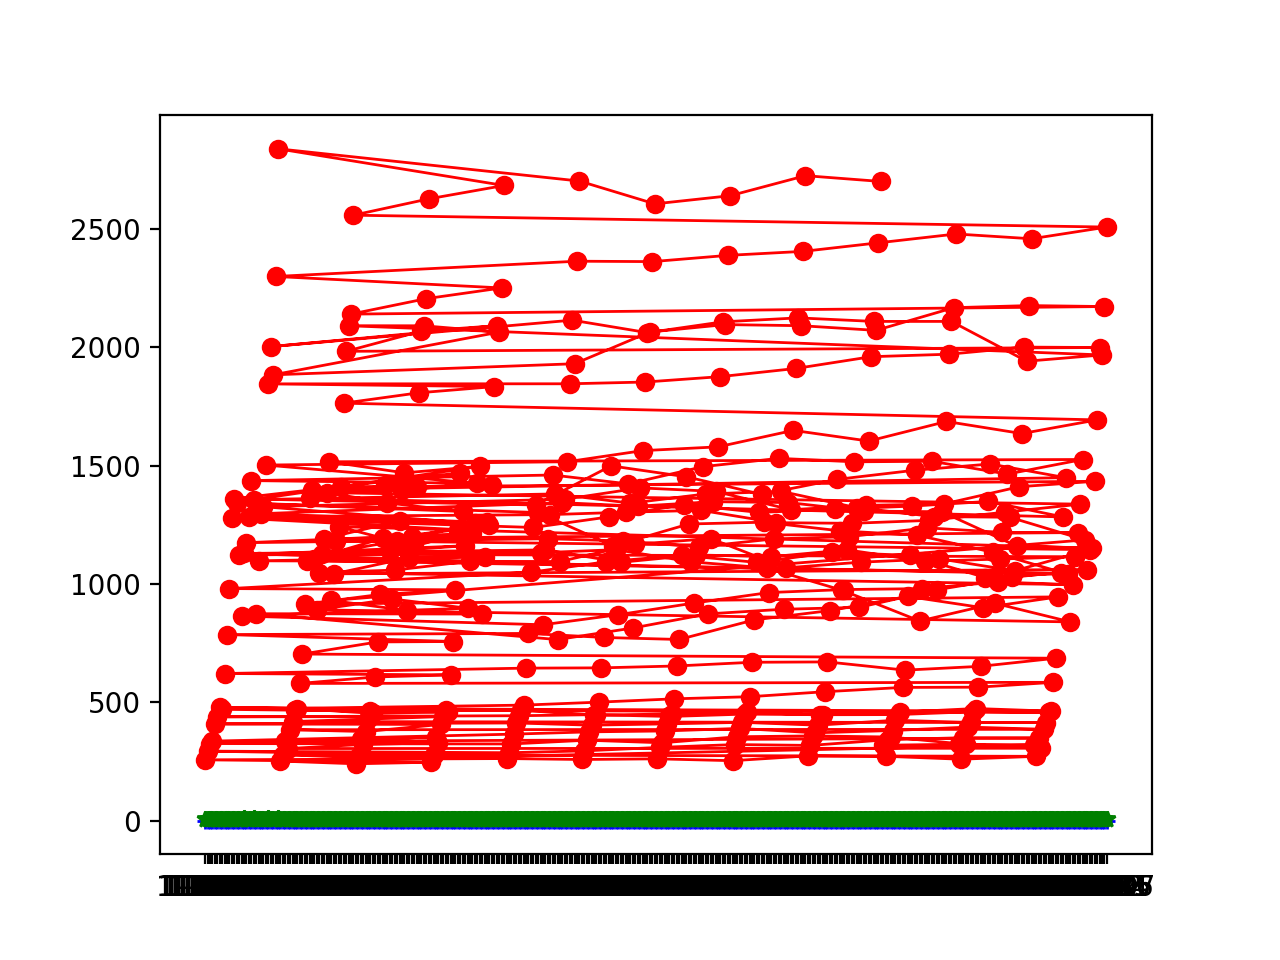

In [53]:
# Create a handle for each plot
spreadhandle = plt.plot(x_axis, spreads, marker="+",color="blue", linewidth=1, label="Spread")
sp500handle = plt.plot(x_axis, sp500, marker="o",color="red", linewidth=1, label="S&P 500")
# neutish = plt.plot(x_axis, neuts, marker="^",color="black", linewidth=1, label="Neutral")
energyish = plt.plot(x_axis, energys, marker="*",color="green", linewidth=1, label="Energy Consumption")

In [ ]:
# Set our legend to where the chart thinks is best
plt.legend(loc="best")

In [ ]:
# Create labels for the X and Y axis
plt.xlabel("Historical Values by Month")
plt.ylabel("Percent Consumer Sentiment")

In [ ]:
# Save and display the chart
plt.savefig("historical_data.png")
plt.show()